# Day 2



Hello, here we are going to talk about:
* 1. [Regularizations L1 and L2](#1)
* 2. [Logistic Regression](#2)
    - 2.1 [Difference between Logistic Regression and Linear Regression](#2.1)
    - 2.2 [Why we can't do a classification problem using Regression?](#2.2)
* 3. [Decision Tree 101](#3)
    - 3.1 [Entropy, Information Gain, Gini Index, Reducing impurity](#3.1)
    - 3.2 [How to control leaf height and pruning?](#3.2)
* 4. [Random Forest 101](#4)
* 5. [What is the Variance and Bias tradeoff](#5)
* 6. [Ensemble of models 101](#6)
* 7. [What is the SVM classification?](#7)
* 8. [Naive Bayes Classification and Gaussian Naive Bayes](#8)
* 9. [Metrics](#9)
    - 9.1 [Confusion matrix](#9.1)
    - 9.2 [Accuracy and Missclassification Rate](#9.2)
    - 9.3 [True Positive Rate & True Negative Rate](#9.3)
    - 9.4 [False Positive Rate & False Negative Rate](#9.4)
    - 9.5 [F1 Score, precision and recall](#9.5)
* 10. [Randomized Search CV](#10)
* 11. [GridSearch CV](#11)
* 12. [BayesianSearch CV](#12)
* 13. [ZCA Whitening](#13)

<a id='1'></a>

## Regularizations L1 and L2

Previosly we unterstood the main logic of linear regresion, today we will start from L1 and L2 regularizations, why we use them, how they are can help to our model etc. Nowadays, linear models are often overlooked. Howerer, we should know, that they are giving good result in relation with other non-linear models, so, it is important to know and undestand how they works, and when we can implement them in our models. We know the linear model uses the least squares method to estimate the parameters and we showed how to implement it.

Now, we explore how we can improve the linear model by replacing least squares fitting with other fitting procedures. These method will give us better prediction accuracy and model interpretability.

The main objective of creating a model(training data) is making sure it fits the data properly and reduce
the loss. Sometimes the model that is trained which will fit the data but it may fail and give a poor
performance during analyzing of data (test data). This leads to overfitting. Regularization came to
overcome overfitting


### L1 Lasso Regression
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “Absolute value of
magnitude” of coefficient, as penalty term to the loss function. Lasso shrinks the less important feature’s coefficient to zero; thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

Methods like Cross-validation, Stepwise Regression are there to handle overfitting and perform feature
selection work well with a small set of features. These techniques are good when we are dealing with a
large set of features.
Along with shrinking coefficients, the lasso performs feature selection, as well. (Remember the
‘selection‘ in the lasso full-form?) Because some of the coefficients become exactly zero, which is
equivalent to the particular feature being excluded from the model.

### L2 Regularization (L2 = Ridge Regression)

Overfitting happens when the model learns signal as well as noise in the training data and wouldn’t
perform well on new/unseen data on which model wasn’t trained on.
To avoid overfitting your model on training data like cross-validation sampling, reducing the number
of features, pruning, regularization, etc.
So to avoid overfitting, we perform Regularization.

Regularization adds the penalty as model complexity increases. The regularization parameter
(lambda) penalizes all the parameters except intercept so that the model generalizes the data and
won’t overfit.
Ridge regression adds “squared magnitude of the coefficient" as penalty term to the loss
function. 

If lambda is zero, then it is equivalent to OLS. But if lambda is very large, then it will add too much
weight, and it will lead to under-fitting.
Ridge regularization forces the weights to be small but does not make them zero and does not give
the sparse solution.
Ridge is not robust to outliers as square terms blow up the error differences of the outliers, and the
regularization term tries to fix it by penalizing the weights
Ridge regression performs better when all the input features influence the output, and all with weights
are of roughly equal size.
L2 regularization can learn complex data patterns.

#### Simple example, how Ridge Regression works you may show from this amazing [video](https://www.youtube.com/watch?v=Q81RR3yKn30)


### The main idea of these regularization is to avoid overfitting, they are pretty similar, and works similar, their formulas are similar, but they have big difference. Let's undestand it from example, 

first lets look at formulas and try to find difference

## Ridge

![](../pics/7.png)

## Lasso

![](../pics/8.png)

Yes, you are right, Ridge takes squared slope and lasso takes absolute value of slope.
We know that ridge just decreases/shrinks the importance of variables, and also we know that lasso just deletes useless junky variables

### Example that shows you difference between lasso and ridge

You must to find the weight of mice, there you have information about their size, age, your cars color, your friends count of follower in instagram. Here we understand, that we have usefull and silly variables.

Lasso will delete all silly variables, but Ridge will just decrease importance for them..

Now, if you understand, that in your data:
- high probability of overfitting, you may use regularization
- if you have small amount of data, and you know, that testing data, or data in real world testing will not exactly similar to your training data you may include regularization to your model
- if you working with big amount of silly, junky variables (columns), you may use Lasso
- if you working with big amount of usefull variables (something like HousePrice dataset), you may use Ridge

### Lasso and Ridge Regressions in Python


First, lets write just linear regression

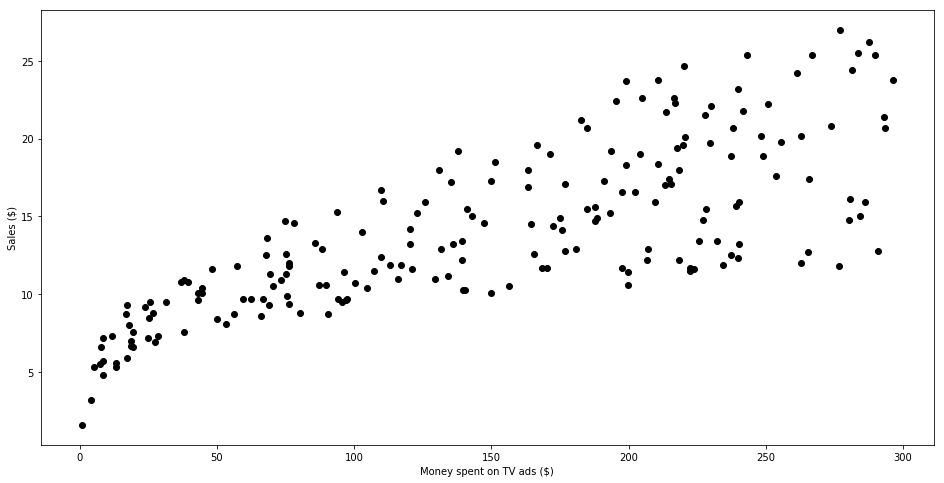

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
df = pd.read_csv('../data/Advertising.csv')
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.head()
plt.figure(figsize=(16, 8))
plt.scatter(
    df['TV'],
    df['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [32]:
X = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 7.0326 + 0.047537X


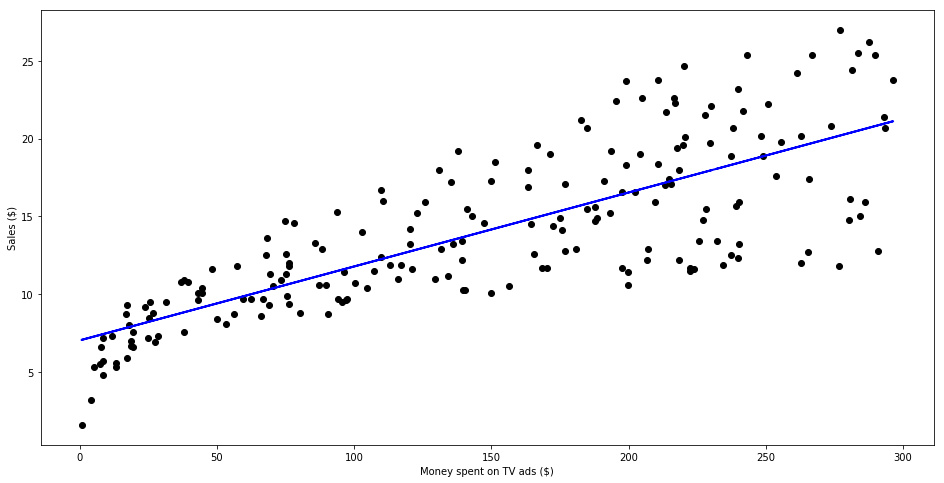

In [33]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    df['TV'],
    df['sales'],
    c='black'
)
plt.plot(
    df['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

From the graph above, it seems that a simple linear regression can explain the general impact of amount spent on TV ads and sales

In [34]:
X = df['TV']
y = df['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           1.47e-42
Time:                        19:02:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

/home/predator/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Let’s see if a multiple linear regression will perform better.

In [35]:
Xs = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [36]:
X = np.column_stack((df['TV'], df['radio'], df['newspaper']))
y = df['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        19:02:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

`Lets spend few minutes to recap information about F-statistics. Here, the F-statistic is calculated for the overall model, whereas the p-value is specific to each predictor. If there is a strong relationship, then F will be much larger than 1. Otherwise, it will be approximately equal to 1.

How larger than 1 is large enough?

This is hard to answer. Usually, if there is a large number of data points, F could be slightly larger than 1 and suggest a strong relationship. For small data sets, then the F value must be way larger than 1 to suggest a strong relationship.

Why can’t we use the p-value in this case?

Since we are fitting many predictors, we need to consider a case where there are a lot of features (p is large). With a very large amount of predictors, there will always be about 5% of them that will have, by chance, a very small p-value even though they are not statistically significant. Therefore, we use the F-statistic to avoid considering unimportant predictors as significant predictors.`

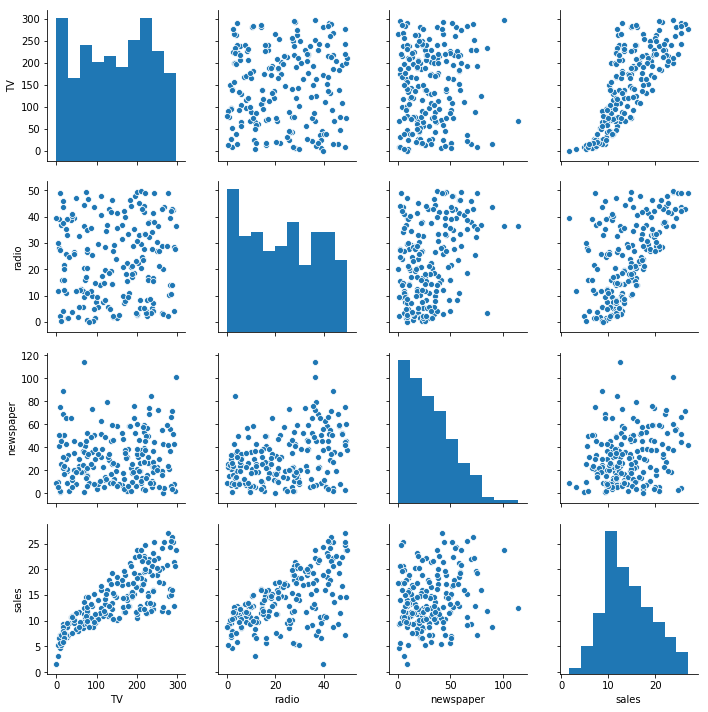

In [37]:
import seaborn as sns
sns.pairplot(df)

###  lets start

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = df.drop(['sales'],axis=1)
y = df['sales'].values.reshape(-1,1)
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg,Xs,y,scoring='neg_mean_squared_error',cv=5)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

-3.07294659710021


In [39]:
MSEs


array([-3.1365399 , -2.42566776, -1.58522508, -5.42615506, -2.79114519])

### Ridge regression

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,2,5,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(Xs,y)
print(ridge_regressor.best_params_,ridge_regressor.best_score_)

{'alpha': 20} -3.0726713383411433


### Lasso regression

In [41]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,2,5,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(Xs,y)
print(lasso_regressor.best_params_,lasso_regressor.best_score_)

/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'alpha': 2} -3.0300246975762115


Now we understand how linear regression works, how we can use regularizations, lets to more interesting ml exercise, lets fit house price with three methods and get best model with best parameters.

In [42]:
from sklearn.datasets import load_boston
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
boston = load_boston()

In [43]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
Y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
# Multiple linear regression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
m = cross_val_score(linear_model,X_test,y_test,cv=5)
m.mean()

0.6391687564712922

In [44]:
params_ridge ={
        'alpha':[i/2 for i in range(1,50)],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }
ridge = Ridge()
ridge_random = RandomizedSearchCV(estimator = ridge, param_distributions = params_ridge,
                               n_iter=50, cv=5, n_jobs=-1,random_state=42, verbose=2)
ridge_random.fit(X_train, y_train)

print(ridge_random.best_params_,ridge_random.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s


{'solver': 'cholesky', 'alpha': 1.0} 0.7031923410613057


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    3.4s finished
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
ridge_grid = GridSearchCV(estimator = ridge,
                          param_grid = params_ridge,
                          cv = 5,
                          n_jobs = -1,
                          verbose = 2)
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_,ridge_grid.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 343 candidates, totalling 1715 fits


[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:    3.5s


{'alpha': 0.5, 'solver': 'auto'} 0.7050010319917787


[Parallel(n_jobs=-1)]: Done 1715 out of 1715 | elapsed:    7.1s finished
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
params_lasso ={
        'alpha':[i/10 for i in range(1,10)]
        }
lasso = Lasso()
lasso_random = RandomizedSearchCV(estimator = lasso, param_distributions = params_lasso,
                               n_iter=50, cv=5, n_jobs=-1,random_state=42, verbose=2)
lasso_random.fit(X_train, y_train)

print(lasso_random.best_params_,lasso_random.best_score_)

/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  45 | elapsed:    0.1s remaining:    0.5s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'alpha': 0.1} 0.6966887968120337


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
model_ridge = ridge_random.best_estimator_
y_pred_ridge = (model_ridge.predict(X_test))
output_ridge = pd.DataFrame({'Sale_Price_fact':y_test ,'SalePrice_pred': y_pred_ridge})

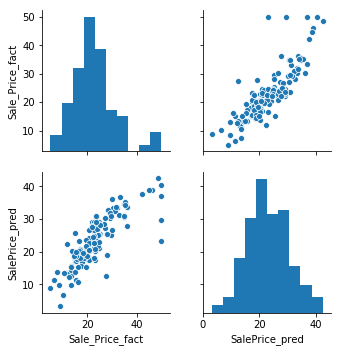

In [48]:
sns.pairplot(output_ridge)

<a id='2'></a>

## Logistic Regression

**Logistic regression** is a machine learning classification algorithm that is used to predict the probability of categorical dependent variable. In logistic regression the dependent variable is a binary variable that contains data coded as 1 or 0. In other words the logistic regression predicts P(Y=1) as a function of X.

### Logistic regression assumptions
* Requires dependent variable to be binary
* Dependent variable as 1 should represent the desired output
* Only meaningful variables should be included in the model
* No multicolinearity
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
bs = load_boston()
X = pd.DataFrame(bs.data,columns=bs.feature_names)
Y = boston.target
Y = Y>Y.mean()
Y = list(map(int,Y))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

## implementing the model

In [50]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.269643
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.602     
Dependent Variable: y                AIC:              216.9071  
Date:               2020-01-03 19:03 BIC:              267.2080  
No. Observations:   354              Log-Likelihood:   -95.454   
Df Model:           12               LL-Null:          -239.92   
Df Residuals:       341              LLR p-value:      9.8920e-55
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
CRIM      -0.1843     0.1534   -1.2012   0.2297   -0.4850    0.1164
ZN         0.0042     0.0132    0.3186   0.7500   -0.0216

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/predator/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85  4]
 [18 45]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        89
           1       0.92      0.71      0.80        63

   micro avg       0.86      0.86      0.86       152
   macro avg       0.87      0.83      0.84       152
weighted avg       0.86      0.86      0.85       152



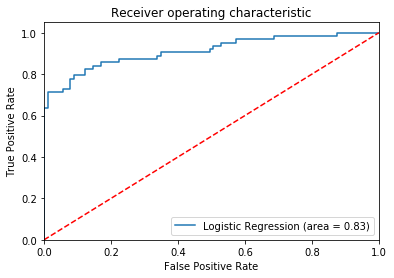

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Here we can configure some paramteres of our model, for example:
#### solverstr, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’lbfgs’)

Algorithm to use in the optimization problem.

* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
* ‘liblinear’ and ‘saga’ also handle L1 penalty
* ‘saga’ also supports ‘elasticnet’ penalty
* ‘liblinear’ does not support setting penalty='none'


<a id='2.1'></a>

### Difference between Logistic Regression and Linear Regression

Linear and Logistic regression are the most basic form of regression which are commonly used. The
essential difference between these two is that Logistic regression is used when the dependent variable
is binary. In contrast, Linear regression is used when the dependent variable is continuous, and the
nature of the regression line is linear.

**Key Differences between Linear and Logistic Regression**

Linear regression models data using continuous numeric value. As against, logistic regression models
the data in the binary values. Linear regression requires to establish the linear relationship among dependent and independent variables, whereas it is not necessary for logistic regression. In linear regression, the independent variable can be correlated with each other. On the contrary, in the logistic regression, the variable must not be correlated with each other.

<a id='2.2'></a>

### Why we can't do a classification problem using Regression?

With linear regression you fit a polynomial through the data - say, like on the example below, we fit
a straight line through {tumor size, tumor type} sample set:
![](../pics/9.png)
Above, malignant tumors get 1, and non-malignant ones get 0, and the green line is our hypothesis
h(x). To make predictions, we may say that for any given tumor size x, if h(x) gets bigger than 0.5,
we predict malignant tumors. Otherwise, we predict benignly.
It looks like this way, we could correctly predict every single training set sample, but now let's change
the task a bit.
Intuitively it's clear that all tumors larger certain threshold are malignant. So let's add another sample
with huge tumor size, and run linear regression again:
![](../pics/10.png)
Now our h(x)>0.5→malignant doesn't work anymore. To keep making correct predictions, we need
to change it to h(x)>0.2 or something - but that not how the algorithm should work.
We cannot change the hypothesis each time a new sample arrives. Instead, we should learn it off the
training set data, and then (using the hypothesis we've learned) make correct predictions for the data
we haven't seen before.
Linear regression is unbounded.

<a id='3'></a>

## Decision Tree 101

A decison tree is a type of supervised learning algorithm that can be used in classification as well as regressor problems. The input to a decision tree can be both continuous as well as categorical. The decision tree works on an if-then statement. Decision tree tries to solve a problem by using tree representation (Node and Leaf)

### Main asssumptions while creating a decision tree: 

1. Initially all the training set is considered as a root 
2. Feature values are preferred to be categorical, if continuous then they are discretized 

3. Records are distributed recursively on the basis of attribute values 
4. Which attributes are considered to be in root node or internal node is done by using a statistical approach.

some jargons:
- the very top of the tree is called the "Root node" or just the 'Root'
- after "root nodes" goes just "nodes", internal nodes have arrow pointing to them and they have arrows pointing away from them
- lastly, estimates are lies in 'Leaf nodes' or just 'Leaves'.

Now we are ready to talk about how to go from raw table data for a decision tree, intuitvely, the first think we should do, it to know which of the dependent variables will be at the top of our tree aka root node. We just check every variable and see to the variation of the result, lastly we will take the variable that separates data mostly good.

to determine which separation is best, we need a way to measure and compary **"impurity"**. The are a bunch of ways to measure impurity, but I'm just going to focus on a very popular one called **"Gini"**. 

#### Good news, Gini impurity formula is pretty easy to understand and memorise!
 `Gini impurity = 1 - (probality of "yes")^2 - (probability of "no")^2`,
 So, we will use the least weighted average of Gini impurity in nodes.
 
 steps to do decision tree
 - calculate all of the gini impurity scores
 - if node itself shows lowest score, than there is no point in separating anymoe, and it becoame leaf node.
 - if separating the data results in an improvement, than pick the separation with the lowest impurity value
 
 So far with formula above we understood how to use it for create Decision tree with binary dependent variables, but what if we have numeric data to predict binary target?
 
- First - sort data from lowest to highest
- Second - calculate the average values for all adjacent variables
- Three - calculate the impurity values for each average weight

these three steps allow us to find best separation to get lowest Gini impurity value.

Now we've talked about how to build a tree with 'binary dependent variables' and 'numeric dependent variables' let's get a look how we should work with **ranked data** and **multiple choise data**.

* Ranked data is similar to numeric data, except instead now we calculate impurity scores for all of the possible ranks. So if people could rank from 1 to 4, we could calculate the following impurity scores. and then select the best impurity

* When there are **multiple choises**, like **color choice can be blue, green or red**, you can calculate an impurity score for each one as well as each possible combination. For this example with three colors we get all possible combinations,except the situations that includes everyone. 

<a id='3.1'></a>

### Entropy, Information Gain, Gini Index, Reducing impurity

We talked before about one of the solutions about optimal split. There are different attributes which define the split of nodes in a decision tree. There are few algorithms to find the optimal split.

* **ID3(Iterative Dichotomiser 3)**: This solution uses Entropy and Information gain as metrics to form a better decision tree. The attribute with the highest information gain is used as a root node, and a similar approach is followed after that. Entropy is the measure that characterizes the impurity of an arbitrary collection of examples.
    - this algorithm can work only with discrete target, and can't handle with missing data
![](../pics/11.png)

Entropy varies from 0 to 1. 0 if all the data belong to a single class and 1 if the class distribution is
equal. In this way, entropy will give a measure of impurity in the dataset.

`Information Gain = 1 - ∑ (Sb/S)*Entropy (Sb)`,where Sb - Subset, S - entire data

* **C4.5** it is just improved ID3, that can handle with missing data
* **CART Algorithm (Classification and Regression trees)** : is the most popolar algorithm, because can work with numerical and categorical data. In CART, we use the GINI index as a metric. We talked about this algorith before.

<a id='3.2'></a>

### How to control leaf height and pruning?
To control the leaf size, we can set the parameters:-
1. **Maximum depth:** 
Maximum tree depth is a limit to stop the further splitting of nodes when the specified tree depth has
been reached during the building of the initial decision tree.
NEVER use maximum depth to limit the further splitting of nodes. In other words: use the
largest possible value.
2. **Minimum split size:**
Minimum split size is a limit to stop the further splitting of nodes when the number of observations
in the node is lower than the minimum split size.
This is a good way to limit the growth of the tree. When a leaf contains too few observations, further
splitting will result in overfitting (modeling of noise in the data).
3. **Minimum leaf size:**
Minimum leaf size is a limit to split a node when the number of observations in one of the child nodes
is lower than the minimum leaf size.
Pruning is mostly done to reduce the chances of overfitting the tree to the training data and reduce
the overall complexity of the tree.


There are two types of pruning: Pre-pruning and Post-pruning.
1. Pre-pruning is also known as the **early stopping criteria**. As the name suggests, the criteria are set as parameter values while building the model. The tree stops growing when it meets any of these pre-pruning criteria, or it discovers the pure classes. Early stopping can hurt your accuracy, usually we use pre-prunning for faster compilation 
2. In Post-pruning, the idea is to allow the decision tree to grow fully and observe the CP value.Next, we prune/cut the tree with the optimal CP(Complexity Parameter) value as the parameter. The CP (complexity parameter) is used to control tree growth. If the cost of adding a variable is higher, then the value of CP, tree growth stops.

Algorithm advantages

Having considered the main problems that arise when building trees, it would be unfair not to mention their advantages:

    - fast learning process;
    - generating rules in areas where it is difficult for an expert to formalize his knowledge;
    - extraction of rules in a natural language;
    - intuitive classification model;
    - high accuracy of prediction, comparable with other methods of data analysis (statistics, neural networks);
    - construction of nonparametric models.

For these and many other reasons, decision trees are an important tool in the work of every data analysis professional

<a id='4'></a>

## Random Forest 101 

Random forests are made out of decision trees, just built a tree with a following steps:
1. Using a bootstrapped dataset.
2. Only considering a random a subset of varaibles at each step.
3. And just do it hundred of times..

### The variety is what makes random forests more effective than individual decision trees.

bootstraping the data is just taking random rows from data, and selected rows **can be repeated**. Bootstrapping the data plus using the aggregate to make a decision is called **bagging** 

typically about 1/3 of the original data does not go in the bootstrapped dataset, thus we can use them to test.. and this data called the **Out-of-Bag Dataset**.

Random Forest is an ensemble machine learning algorithm that follows the bagging technique.The base estimators in the random forest are decision trees. Random forest randomly selects a set of features that are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

To sum up, the Random forest randomly selects data points and features and builds multiple trees (Forest).
Random Forest is used for feature importance selection. The attribute (.feature_importances_) is used to find feature importance.

Some Important Parameters:-
1. n_estimators:- It defines the number of decision trees to be created in a random forest.
2. criterion:- "Gini" or "Entropy."
3. min_samples_split:- Used to define the minimum number of samples required in a leaf node before a split is attempted
4. max_features: -It defines the maximum number of features allowed for the split in each decision tree.
5. n_jobs:- The number of jobs to run in parallel for both fit and predict. Always keep (-1) to use all the cores for parallel processing .

<a id='5'></a>

## What is the Variance and Bias tradeoff 

In predicting models, the prediction error is composed of two different errors
1. Bias
2. Variance

It is important to understand the variance and bias trade-off which tells about to minimize the Bias and Variance in the prediction and avoids overfitting & under fitting of the model.

**Bias:** It is the difference between the expected or average prediction of the model and the correct value which we are trying to predict. Imagine if we are trying to build more than one model by collecting different data sets, and later on, evaluating the prediction, we may end up by different prediction for all the models. So, bias is something which measures how far these model prediction from the correct prediction. It always leads to a high error in training and test data. In other words, bias is the relationship between data points.

**Variance:** Variability of a model prediction for a given data point. We can build the model multiple times, so the variance is how much the predictions for a given point vary between different realizations of the model. In other words in machine learning, the difference in fits between data sets is called **Variance**.

![](../pics/12.png)

We should ask ourselves, why we should get a look for a bias and variance trade-off,
- it can avoid you from underfitting and overfitting
- it can help you to tune complexity of your model

<a id='6'></a>

## Ensemble of models 101 

First, lets talk about ensembles, in a few words ensembles recommended itself like a most effective algorithms, thats showing awesome results in kaggle competitions. The main idea of ensembles is that big amount of small and weak algorithms can gain more effective results than single model. 
#### Ensemble methods: bagging, boosting and stacking.

in this section we will start from the example with weak and strong students and will cover three main types of ensembles. Then we will discuss more clearly about bagging and recap jargons like bootstrap, bagging and random forest. in the third section finally, we will see, how boosting works, and get an answer, what is the difference between adaboost and gradient boost. Additionally in the end of this section about ensembles we will talk stacking.


### Finally what is the ensembles???

it is the paradigm of machine learning algorithms - where several weak models are learning to solve one exact objective, then they are come together  to give one common more exact answer. Main approach of the ensembles is 
that with right combinations of weak model we can get more effective results.

Indeed, in machine learning independent  what we are going to predict, classification or regression the main key of good results is the **model selection**. Model selection depends for many factors like: amount of data, type of data, dimension of space, hypothesises about distribution of data etc. Interesting? Ok, thats great, but about it we will talk in other lessons :) now lets understand what is these three types of ensemble :)

### Bagging, Boosting, Stacking
Decision trees have been around for a long time and also known to suffer from bias and variance. You will have a large bias with simple trees and a large variance with complex trees.



**Bagging (Bootstrap Aggregation)** is used when our goal is to reduce the variance of a decision tree. Here the idea is to create several subsets of data from the training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree. Models in bagging are independent from each other.

**Boosting** is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample), and at every step, the goal is to solve for net error from the prior tree. When a hypothesis misclassifies an input, its weight is increased, so that the next hypothesis is more likely to classify it correctly. By combining the whole set at the end converts weak learners into a better performing model. For better understanding how boosting workds, we should to check how wokrds adaptive boosting and gradient boosting, now in a few words we can say that adaptive boosting updates the weights attached to each of the training dataset objects, while gradient boosting updates the values of these objects. This difference comes from the fact that both methods try to solve the optimization problem, which consists in finding the best model, which can be written as a weighted sum of weak students.

**Stacking** for the first view it it a little bit complicated, fourtunetaly it is also easy. models learned independent for each other, then we will do some metamodel which selects some amount of models and from these model we generate the final results.

In general we can say that bagging tries to decrease variance, boosting and stacking tries to generate strong model with more less bias than their components.

### in the next lessons we will have practive lessons with these ensembles, now lets go on with theory.

<a id='7'></a>

## What is the SVM classification?

`A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.`

SVM or Large margin classifier is a supervised learning algorithm that uses a powerful technique
called SVM for classification.

We have two types of SVM classifiers:
1. Linear SVM: In Linear SVM, the data points are expected to be separated by some apparent
gap. Therefore, the SVM algorithm predicts a straight hyperplane dividing the two classes. The
hyperplane is also called as maximum margin hyperplane

![](../pics/15.png)

2. Non-Linear SVM: It is possible that our data points are not linearly separable in a p-
dimensional space, but can be linearly separable in a higher dimension. Kernel tricks make it
possible to draw nonlinear hyperplanes. Some standard kernels are a) Polynomial Kernel b) RBF
kernel(mostly used)

![](../pics/16.png)

**Advantages of SVM classifier:**
1. SVMs are effective when the number of features is quite large.
2. It works effectively even if the number of features is greater than the number of samples.
3. Non-Linear data can also be classified using customized hyperplanes built by using kernel trick.
4. It is a robust model to solve prediction problems since it maximizes margin.

**Disadvantages of SVM classifier:**
1. The biggest limitation of the Support Vector Machine is the choice of the kernel. The wrong choice of the kernel can lead to an increase in error percentage.
2. With a greater number of samples, it starts giving poor performances.
3. SVMs have good generalization performance, but they can be extremely slow in the test phase.
4. SVMs have high algorithmic complexity and extensive memory requirements due to the use of quadratic programming.


Here maybe you will be confused about some words like: kernels, hyperlines, ok!

Hyperlines it is just lines that lies in multidimensional data.

Let's see more clearly about kernels with the example.

We know the purpose of SVM, just separate data for classes, and  with data like above it is easy to do. What if I will ask you to separate data below?:

![](../pics/17.png)

for the first view it is a litle bit hard, because clearly there is no line that can separate these two classes. So what do we do? We apply transformation and add one more dimension as we call z-axis. Lets assume value of points on z plane, **w=x^2+y^2**.  In this case we can manipulate it as distance of point from z-origin. Now if we plot in z-axis, a clear separation is visible and a line can be drawn.



![](../pics/18.png)

When we transform back this line to original plane, it maps to circular boundary as shown in image E. These transformations are called **kernels.**

![](../pics/19.png)

# Good news, you don’t have to guess/ derive the transformation every time for your data set. The sklearn library's SVM implementation provides it by itself.

Okay here we understood what is the SVM, hyperlines and kernels, let's consider a little bit complex situations. What if data points is overlaps? Or, what in case some of the black points are inside the blue ones? Which line among 1 or 2?should we draw? (1 with some outliers, 2 without any otuliers)

Which one do you think? Well, both the answers are correct. The first one tolerates some outlier points. The second one is trying to achieve 0 tolerance with perfect partition.
But, there is **trade off**. In real world application, finding perfect class for millions of training data set takes lot of time. As you will see in coding. This is called regularization parameter. In next section, we define two terms regularization parameter and **gamma**. These are tuning parameters in SVM classifier. Varying those we can achive considerable non linear classification line with more accuracy in reasonable amount of time. In coding exercise (part 2 of this chapter about SVM) we shall see how we can increase the accuracy of SVM by tuning these parameters.

# Lets talk about termins in SVM, clearly tuning parameters: kernel, regularization, gamma and margin.

## Kernel
The learning of the hyperplane in linear SVM is done by transforming the problem using some linear algebra. This is where the kernel plays role.
For **linear kernel** the equation for prediction for a new input using the dot product between the input (x) and each support vector (xi) is calculated as follows:

`f(x) = B(0) + sum(ai * (x,xi))`

This is an equation that involves calculating the inner products of a new input vector (x) with all support vectors in training data. The coefficients B0 and ai (for each input) must be estimated from the training data by the learning algorithm.

The polynomial kernel can be written as K(x,xi) = 1 + sum(x * xi)^d and exponential as K(x,xi) = exp(-gamma * sum((x — xi²)). [Source for this excerpt : http://machinelearningmastery.com/].
Polynomial and exponential kernels calculates separation line in higher dimension. This is called kernel trick

## Regularization

The Regularization parameter (often termed as C parameter in python’s sklearn library) tells the SVM optimization how much you want to avoid misclassifying each training example.

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

The images below (same as image 1 and image 2 in section 2) are example of two different regularization parameter. First one has some misclassification due to lower regularization value. Higher value leads to results like right one.

The images below (same as image 1 and image 2 in section 2) are example of two different regularization parameter. Second one has some misclassification due to lower regularization value. Higher value leads to results like right one.

1
![1](../pics/20.png)
2
![2](../pics/22.png)


## Gamma

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with **low gamma**, points far away from plausible seperation line are considered in calculation for the seperation line. Where as **high gamma** means the points close to plausible line are considered in calculation.


![](../pics/23.png)

![](../pics/24.png)

## Margin

And finally last but very importrant characteristic of SVM classifier. SVM to core tries to achieve a good margin.

#### A margin is a separation of line to the closest class points.

A **good margin** is one where this separation is larger for both the classes. Images below gives to visual example of good and bad margin. A good margin allows the points to be in their respective classes without crossing to other class.

![](../pics/25.png)
![](../pics/26.png)


### I think that you didn't use much the SVM, as Random Forest and Decision Tree, so lets do some practive with SVM.

### Experemental example

We are going to text classification using SVM :) lets download data [here](https://github.com/Gunjitbedi/Text-Classification/blob/master/corpus.csv)



In [59]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
np.random.seed(500)

[nltk_data] Downloading package punkt to /home/predator/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/predator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
Corpus = pd.read_csv("../data/corpus.csv",encoding='latin-1')


Lets do preprocessing of data, because NLP can't understand inital format of our data, below the two main techniques for preprocessing text.

* **Tokenization** This is a process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens. The list of tokens becomes input for further processing. NLTK Library has word_tokenize and sent_tokenize to easily break a stream of text into a list of words or sentences, respectively.
* **Word Stemming/Lemmatization** The aim of both processes is the same, reducing the inflectional forms of each word into a common base or root. Lemmatization is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

In [61]:
# 1. Remove NA
Corpus['text'].dropna(inplace=True)
# 2. To lowercase 
Corpus['text'] = [i.lower() for i in Corpus['text']]
# 3. now when we can do tokenization
Corpus['text'] = [word_tokenize(i) for i in Corpus['text']]
# 4. Remove stopwords, Non-Numeric and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc.
# By default it is set to Noun

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [62]:
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/predator/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/predator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
for index,entry in enumerate(Corpus['text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    Corpus.loc[index,'text_final'] = str(Final_words)

In [64]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],
                                                                    Corpus['label'],
                                                                    test_size=0.3)

In [65]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

### Word Vectorization
It is a general process of turning a collection of text documents into numerical feature vectors.Their are many methods to convert text data to vectors which the model can understand but by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency — Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This down scales words that appear a lot across documents.

Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

The following syntax can be used to first fit the TG-IDF model on the whole corpus. This will help TF-IDF build a vocabulary of words which it has learned from the corpus data and 
it will assign a unique integer number to each of these words. Their will be maximum of 5000 unique words/features as we have set parameter max_features=5000.

Finally we will transform Train_X and Test_X to vectorized Train_X_Tfidf and Test_X_Tfidf. These will now contain for each row a list of unique integer number and its associated importance as calculated by TF-IDF.

In [66]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

You can use the below syntax to see the vocabulary that it has learned from the corpus

In [67]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.66666666666667


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [69]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
#grid.fit(Train_X_Tfidf, Train_Y)  just exclude comment

<a id='8'></a>

## Naive Bayes Classification and Gaussian Naive Bayes 

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

![](../pics/27.png)

Now, with regards to our dataset, we can apply Bayes’ theorem in following way:

**P(y|X) = {P(X|y) P(y)}/{P(X)}**

where, y is class variable and X is a dependent feature vector (of size n) where:

**X = (x_1,x_2,x_3,.....,x_n)**

![](../pics/28.png)

To clear, an example of a feature vector and corresponding class variable can be: (refer 1st row of the dataset)

- **X = (Rainy, Hot, High, False)**
- **y = No So basically**
- **P(X|y)** here means, the probability of “Not playing golf” given that the weather conditions are “Rainy outlook”, “Temperature is hot”, “high humidity” and “no wind”.

### Naive Bayes Classification:
1. We assume that no pair of features are dependent. For example, the temperature being ‘Hot’ has nothing to do with the humidity, or the outlook being ‘Rainy’ does not affect the winds. Hence, the features are assumed to be independent.
2. Secondly, each feature is given the same weight (or importance). For example, knowing the only temperature and humidity alone can’t predict the outcome accurately. None of the attributes is irrelevant and assumed to be contributing equally to the outcome

### Gaussian Naive Bayes
Continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell-shaped curve which is symmetric about the mean of the feature values.

This is as simple as calculating the mean and standard deviation values of each input variable (x) for each class value.

* Mean (x) = 1/n * sum(x)

Where **n** is the number of instances, and x is the values for an input variable in your training data.

We can calculate the standard deviation using the following equation:

Standard deviation(x) = sqrt (1/n * sum(xi-mean(x)^2 ))

When to use what? Standard Naive Bayes only supports categorical features, while Gaussian Naive Bayes only supports continuously valued features.

In [70]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  83.23333333333333


<a id='9'></a>

## Metrics

lets have a fun and just recap a little bit abour classification metrics..

<a id='9.1'></a>

### Confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.
This is the key to the confusion matrix. It gives us insight not only into the errors being made by a classifier but, more importantly, the types of errors that are being made.

Definition of the Terms:
1. Positive (P): Observation is positive (for example: is an apple).
2. Negative (N): Observation is not positive (for example: is not an apple).
3. True Positive (TP): Observation is positive, and is predicted to be positive.
4. False Negative (FN): Observation is positive, but is predicted negative.
5. True Negative (TN): Observation is negative, and is predicted to be negative.
6. False Positive (FP): Observation is negative, but is predicted positive.

<a id='9.2'></a>

### Accuracy and Missclassification Rate
Accuracy is defined as the ratio of the sum of True Positive and True Negative by Total(TP+TN+FP+FN)
However, there are problems with accuracy. It assumes equal costs for both kinds of
errors. A 99% accuracy can be excellent, good, medium, poor, or terrible depending upon the problem.


Misclassification Rate is defined as the ratio of the sum of False Positive and False
Negative by Total(TP+TN+FP+FN)
Misclassification Rate is also called Error Rate.

![](../pics/13.png)

<a id='9.3'></a>

### True Positive Rate & True Negative Rate

- True Positive Rate:
Sensitivity (SN) is calculated as the number of correct positive predictions divided by the
total number of positives. It is also called Recall (REC) or true positive rate (TPR). The best
sensitivity is 1.0, whereas the worst is 0.0.

- True Negative Rate
Specificity (SP) is calculated as the number of correct negative predictions divided by the
total number of negatives. It is also called a true negative rate (TNR). The best specificity is
1.0, whereas the worst is 0.0.

<a id='9.4'></a>

### False Positive Rate & False Negative Rate

- False Positive Rate
False positive rate (FPR) is calculated as the number of incorrect positive predictions divided by the
total number of negatives. The best false positive rate is 0.0, whereas the worst is 1.0. It can also be
calculated as 1 – specificity.
- False Negative Rate
False Negative rate (FPR) is calculated as the number of incorrect positive predictions divided by
the total number of positives. The best false negative rate is 0.0, whereas the worst is 1.0.

![](../pics/14.png)

<a id='9.5'></a>

### F1 Score, precision and recall

Recall can be defined as the ratio of the total number of correctly classified positive examples
divide to the total number of positive examples.
1. High Recall indicates the class is correctly recognized (small number of FN).
2. Low Recall indicates the class is incorrectly recognized (large number of FN).


To get the value of precision, we divide the total number of correctly classified positive examples
by the total number of predicted positive examples.
1. High Precision indicates an example labeled as positive is indeed positive (a small number
of FP).
2. Low Precision indicates an example labeled as positive is indeed positive (large number of
FP).


* Remember:

`High recall, low precision: This means that most of the positive examples are correctly recognized
(low FN), but there are a lot of false positives.
Low recall, high precision: This shows that we miss a lot of positive examples (high FN), but those
we predict as positive are indeed positive (low FP).`

Since we have two measures (Precision and Recall), it helps to have a measurement that represents
both of them. We calculate an F-measure, which uses Harmonic Mean in place of Arithmetic
Mean as it punishes the extreme values more.

<a id='10'></a>

## Randomized Search CV
Randomized search CV is used to perform a random search on hyperparameters. Randomized
search CV uses a fit and score method, predict proba, decision_func, transform, etc..,
The parameters of the estimator used to apply these methods are optimized by cross-validated
search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of
parameter settings is sampled from the specified distributions. The number of parameter settings that
are tried is given by n_iter.

<a id='11'></a>

## GridSearch CV
Grid search is the process of performing hyperparameter tuning to determine the optimal values for
a given model. Grid search runs the model on all the possible range of hyperparameter values and outputs the best
model

<a id='12'></a>

## BayesianSearch CV
Bayesian search, in contrast to the grid and random search, keeps track of past evaluation results,
which they use to form a probabilistic model mapping hyperparameters to a probability of a score on
the objective function.

<a id='13'></a>

## ZCA Whitening

## References
1. [ML 101](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)
2. [SVM Parameter Tuning in Scikit Learn using GridSearchCV](https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0?source=search_post---------3)

In [71]:
 ! jupyter nbconvert --to html ML2.ipynb

[NbConvertApp] Converting notebook ML2.ipynb to html
[NbConvertApp] Writing 659078 bytes to ML2.html


In [8]:
27/40

0.675